In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


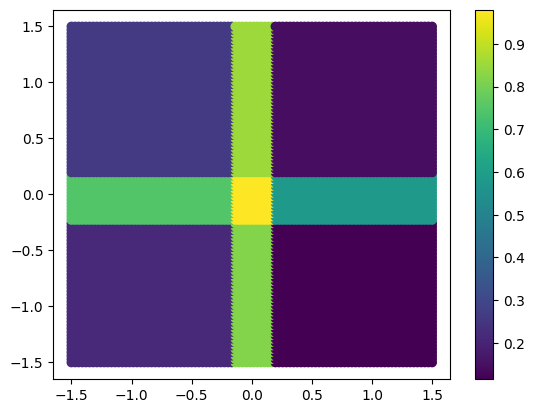

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import KBinsDiscretizer
from sklearn import datasets

## Create data
X, y = datasets.make_circles(n_samples=200, shuffle=True, noise=0.2, random_state=11, factor=0.3)

## Train-test split
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)


X_grid = np.array(np.meshgrid(np.linspace(-1.5,1.5,100), np.linspace(-1.5,1.5,100))).reshape(2, 100*100).T

ds_lr = Pipeline([('expander', KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='quantile')),
                  ('model', LogisticRegression(penalty='none'))])

fitted_ds_lr = ds_lr.fit(train_X, train_y)
grid_preds = fitted_ds_lr.predict_proba(X_grid)
plt.scatter(X_grid[:,0], X_grid[:,1], c = grid_preds[:,1])
plt.colorbar()
plt.show()

each bins have equal number of points. The center cell is smallar because the data concentration is higher. The corner cells are larger because the concentration is lower. 

## Part B
Uniform allows identical width for each bin and quantile allows identical number for each bin. 
According to the documentation, 
- ‘uniform’: All bins in each feature have identical widths.
- ‘quantile’: All bins in each feature have the same number of points.

We will use 'quantile' because data is not evenly distributed. 

## part c
If we use more bins, we would expect the uniform and quantile strategies to be more similar as the number of the points in each bin will decrease. 


## Part d

If we use infinitesmally small bins (more bins), we are basically not performing binning at all :)
This will also make model overfit the data, because because we are increasig variance. 

In [15]:
#2-a
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import SplineTransformer

from sklearn.model_selection import GridSearchCV

pipe = Pipeline([('expander', SplineTransformer(degree=2, n_knots= 1)),
                  ('model', LogisticRegression(penalty='none', max_iter = int(1e6)))])


parms = {
        'expander__n_knots' : range(2, 5),
        'expander__degree' : range(1, 5)
        }

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, parms, cv=5, scoring='accuracy').fit(train_X, train_y)
print(grid.best_estimator_)
                  

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be remov

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be remov

Pipeline(steps=[('expander', SplineTransformer(degree=1, n_knots=4)),
                ('model',
                 LogisticRegression(max_iter=1000000, penalty='none'))])


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [17]:
print(grid.best_estimator_)
print(f'best accuracy: {grid.best_score_}')

Pipeline(steps=[('expander', SplineTransformer(degree=1, n_knots=4)),
                ('model',
                 LogisticRegression(max_iter=1000000, penalty='none'))])
best accuracy: 0.9625


In [21]:
# Part b

## Setup knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn_class = KNeighborsClassifier(n_neighbors = 10, weights = 'distance')

## Import
from sklearn.model_selection import cross_validate

cv_results = cross_validate(knn_class, train_X, train_y, cv = 5, scoring = 'accuracy')

## Average (function is from numpy library)
np.average(cv_results['test_score'])

0.94375

best model from part a perform better than the knn model from part b.

In [20]:
from sklearn.metrics import accuracy_score
y_predicted = grid.best_estimator_.fit(train_X,train_y).predict(test_X)
accuracy_score(test_y, y_predicted)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


0.95